# Income prediction using Machine learning
Performed exploratory data analysis on a large dataset of 34,000 instances and successfully handled all missing values • Implemented data preprocessing, data mining methods to convert imbalanced dataset to balanced dataset • Executed model fitting across three models, logistic regression, neural networks and support vector machine. The neural network model was concluded to be the most accurate model with an accuracy of 83%

In [2]:
# All the necessary libraries are imported 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from tqdm import tqdm
import seaborn as sns 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches

In [3]:
# The dataset which is in csv format is read here
data = pd.read_csv('/Users/manishakaila/Desktop/Github/adult.csv')
# The column names from the dataset are added to the dataframe
data.columns = ['age', 'workclass', 'fnlwgt', 'education',
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [199]:
# The data preprocessing begins from here where all the missing values (?) are located and replaced by a nan value

df = data.replace(' ?', np.nan)
df.shape
# Rows which consist of a nan value are fully eliminated
df = df.dropna(axis = 0, how='any')

In [200]:
df.shape

(30161, 15)

<function matplotlib.pyplot.show>

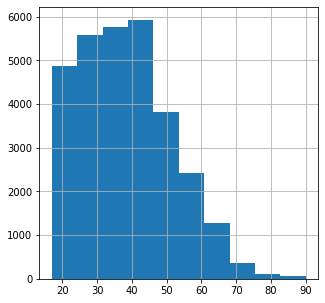

In [201]:
df['age'].hist(figsize = (5,5))
plt.show

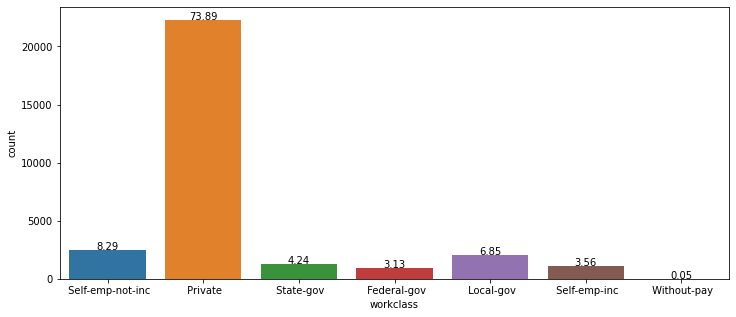

In [202]:
plt.figure(figsize=(12,5))

total = float(len(df['income']))

a = sns.countplot(x='workclass',data=df)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")
plt.show()

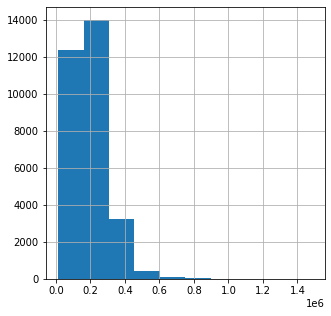

In [203]:
df['fnlwgt'].hist(figsize = (5,5))
plt.show()

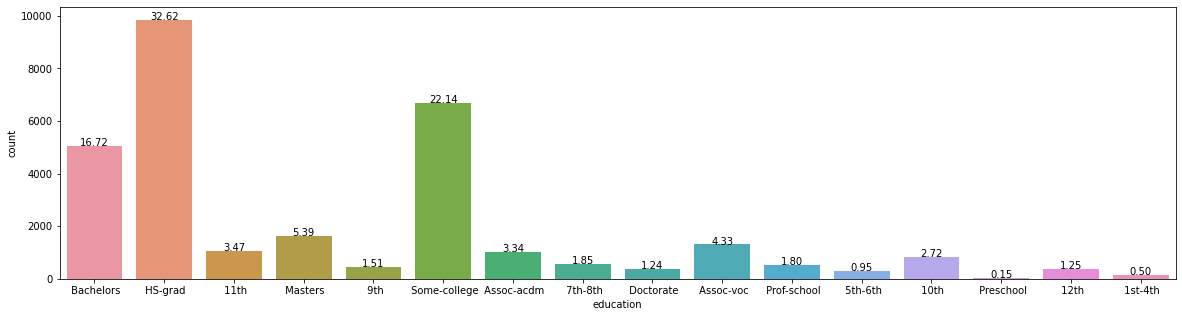

In [204]:
plt.figure(figsize=(20,5)) # we can group these into 4 types 

a= float(len(['income']))

a= sns.countplot(x='education',data=df)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
plt.show()

<function matplotlib.pyplot.show>

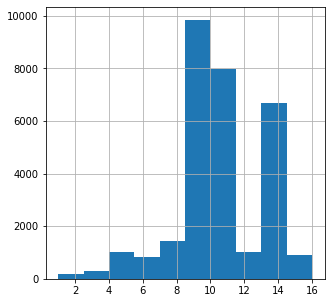

In [205]:
df['education_num'].hist(figsize = (5,5))
plt.show

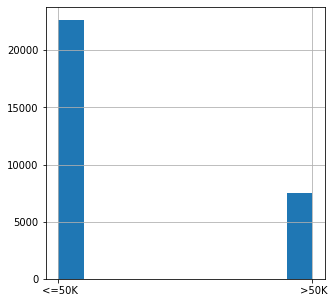

In [206]:
df['income'].hist(figsize = (5,5))
plt.show()

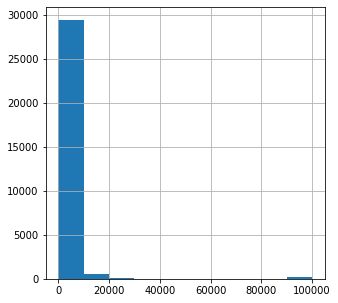

In [207]:
df['capital_gain'].hist(figsize=(5,5))
plt.show()

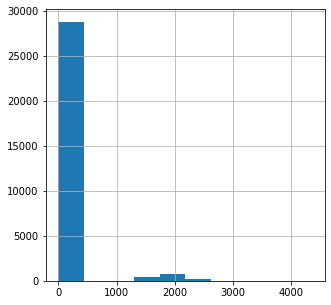

In [208]:
df['capital_loss'].hist(figsize=(5,5))
plt.show()

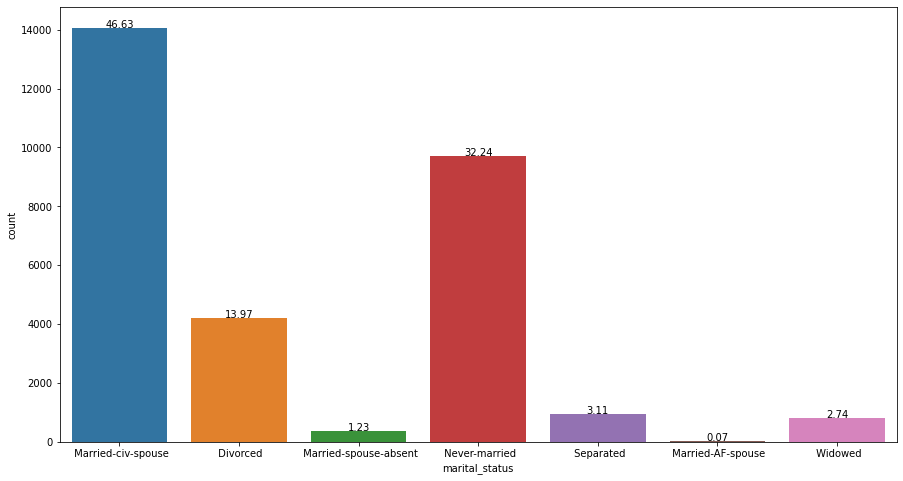

In [209]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="marital_status", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

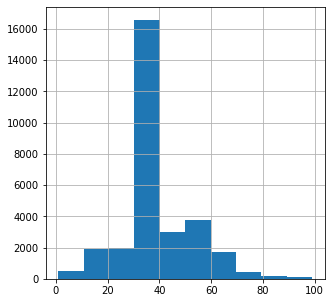

In [210]:
df['hours_per_week'].hist(figsize=(5,5))
plt.show()

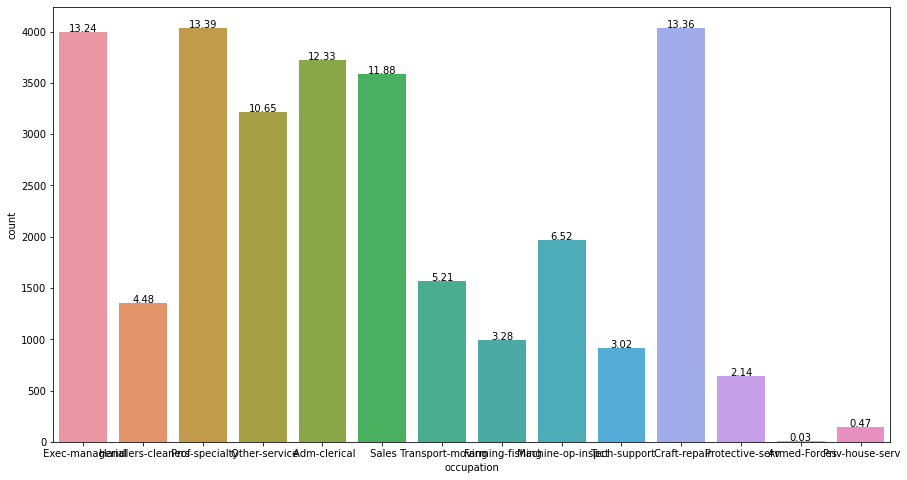

In [211]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="occupation", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

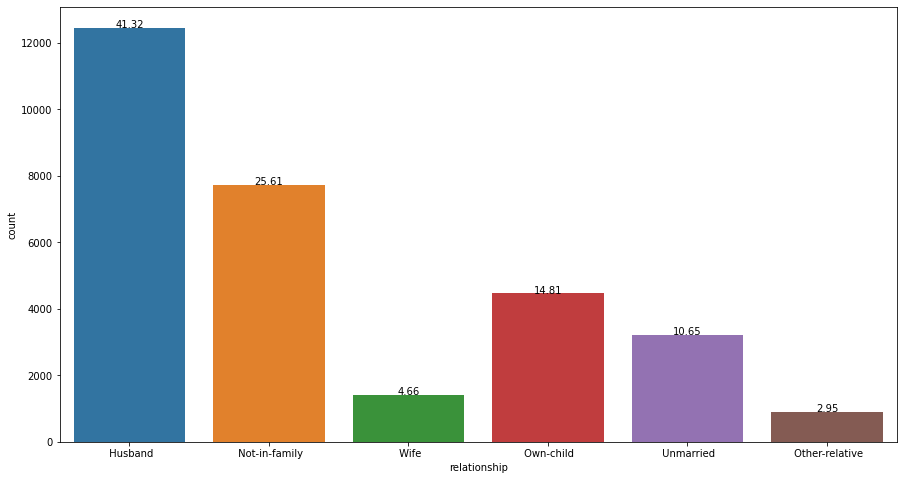

In [212]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="relationship", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

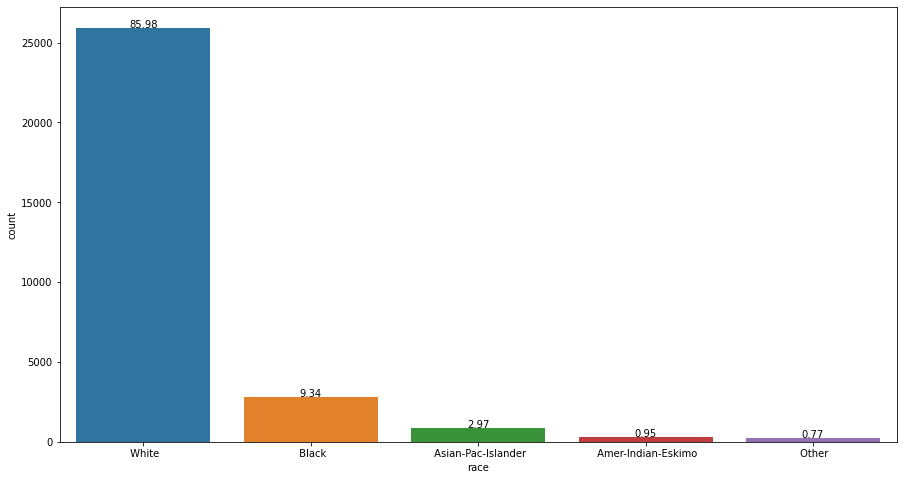

In [213]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="race", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

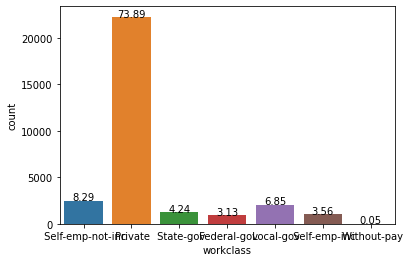

In [214]:
# plt.figure(figsize=(5,5))
total = float(len(df) )

ax = sns.countplot(x="workclass", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

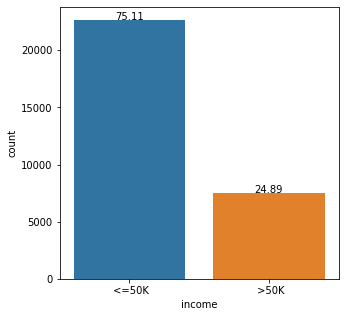

In [215]:
plt.figure(figsize=(5,5))
total = float(len(df) )

ax = sns.countplot(x="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [216]:
# Column names are renamed here for a better readability
df.rename(columns={'capital_gain': 'capital gain', 'capital_loss': 'capital loss', 'native_country': 'country','hours_per_week': 'hours per week','marital_status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [217]:
# Here the columns with a non numerical value are converted into a categorial type
# after which they are converted into codes wihch specify the initial category the values were in for 
# easier modelling of the data
df['workclass'] = df['workclass'].astype('category')
df['education'] = df['education'].astype('category')
df['marital'] = df['marital'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')
df['country'] = df['country'].astype('category')

df['workclass'] = df['workclass'].cat.codes.astype('category')
df['education'] = df['education'].cat.codes.astype('category')
df['marital'] = df['marital'].cat.codes.astype('category')
df['occupation'] = df['occupation'].cat.codes.astype('category')
df['relationship'] = df['relationship'].cat.codes.astype('category')
df['race'] = df['race'].cat.codes.astype('category')
df['sex'] = df['sex'].cat.codes.astype('category')
df['country'] = df['country'].cat.codes.astype('category')

In [218]:
from sklearn.preprocessing import StandardScaler
# The data is scaled using a standard scaler to minimize the variance differences between columns
# this will ensure the data gives much accurate results
sc = StandardScaler()
df[['age','workclass','fnlwgt','education','education_num','marital','occupation','relationship','race','sex','capital gain', 'capital loss', 'hours per week','country']] = sc.fit_transform(df[['age','workclass','fnlwgt','education','education_num','marital','occupation','relationship','race','sex','capital gain', 'capital loss', 'hours per week','country']])

In [219]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
0,0.880275,1.888018,-1.007909,-0.349871,1.128961,-0.387243,-0.734609,-0.885732,0.385055,0.692823,-0.147437,-0.21859,-2.331495,0.264929,<=50K
1,-0.033338,-0.208884,0.244659,0.174749,-0.439703,-1.722362,-0.238260,-0.261254,0.385055,0.692823,-0.147437,-0.21859,-0.077735,0.264929,<=50K
2,1.108678,-0.208884,0.425206,-2.448351,-1.224035,-0.387243,-0.238260,-0.885732,-2.010994,0.692823,-0.147437,-0.21859,-0.077735,0.264929,<=50K
3,-0.794682,-0.208884,1.406626,-0.349871,1.128961,-0.387243,0.754439,2.236660,-2.010994,-1.443370,-0.147437,-0.21859,-0.077735,-5.303944,<=50K
4,-0.109472,-0.208884,0.897147,0.437059,1.521127,-0.387243,-0.734609,2.236660,0.385055,-1.443370,-0.147437,-0.21859,-0.077735,0.264929,<=50K


In [220]:
# The output is converted into a binary output for accurate model fitting
df = df.replace(' <=50K',0)
df = df.replace(' >50K',1)
df = df.sample(n=10000)

In [221]:
df = df[['age','workclass','fnlwgt','education','education_num','marital','occupation','relationship','race','sex','capital gain', 'capital loss', 'hours per week','country','income']]

train_df,test_df = train_test_split(df,train_size=0.8)

In [222]:
class LogisticRegression:
    
    def __init__(self, learningRate, tolerance, maxIteration = 5):
        
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
    
    def datasetReader(self, train_df, test_df):
        
        # The dataset is split here into a training and testing set and all the column types are
        # converted into floating types
        train_df, test_df = np.array(train_df, dtype = np.float64), np.array(test_df, dtype=np.float64)
        X_train, y_train = train_df[:, 1:] , train_df[:, -1]
        X_test, y_test = test_df[:, 1:] , test_df[:, -1]
        
        return X_train, y_train, X_test, y_test
    
    def sigmoid(self, z):
        sig = 1 / (1+np.exp(-z))
        return sig
    
    def costFunction(self, X, y):

        lambda_ = .0001
        sig = self.sigmoid(X.dot(self.w))
        one = np.ones((y.shape[0],1))
        pred_ = y * np.log(sig) + (one-y) * np.log(one - sig)
        #pred_ = (-((y.T*np.log(sig)) + (one -y ).T * np.log(one - sig))/y.shape[0])
        reg = (lambda_/(y.shape[0]))*(self.w) #L1 Regularisation
        #reg = (lambda_/2*(y.shape[0]))*((self.w)*(self.w)) #L2 Regularisation
        reg = reg.sum()
        cost = pred_.sum()
        cost = cost + reg
        
        return cost
    
    def gradient(self, X, y):                                        
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)

        return grad
    
    def gradientDescent(self, X, y):

        costSequence = []
        lastCost = float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            print(self.w)
            currentCost = self.costFunction(X, y)
            diff = lastCost - currentCost
            print(currentCost)
            lastCost = currentCost
            costSequence.append(currentCost)

            if diff < self.tolerance:
                print('The Model Stopped - No Further Improvement')
                break
        self.plotCost(costSequence)

        return
    
    def plotCost(self, costSequence):

        s = np.array(costSequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel = 'iterations', ylabel = 'cost', title = 'cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor = (1.05, 1), shadow = True)
        plt.show()

    def predict(self, X):

        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)

    def evaluate(self, y, y_hat):  
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        print(confusion_matrix(y, y_hat))
        accuracy = ((y == y_hat).sum()) / y.size
        precision = ((y & y_hat).sum()) / y_hat.sum()
        recall = ((y & y_hat).sum()) / y.sum()

        return accuracy, recall, precision
       
    def runModel(self,train_df,test_df):
        
        self.train_df = train_df
        self.test_df = test_df
        self.X_train, self.y_train, self.X_test, self.y_test = self.datasetReader(train_df,test_df)
        print(self.X_train.shape)
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        print("SELF.W:",self.w)

        y_hat_train = self.predict(self.X_train)
        accuracy, recall, precision = self.evaluate(self.y_train, y_hat_train)
        
        print('Training Accuracy: ', accuracy)
        print('Training Precision: ', precision)
        print('Training Recall: ', recall)
        

In [223]:
# MODEL 1 - LOGISTIC REGRESSION

# The logistic regression model is fitted on the dataset to see how the input is behaving to predict an output
lr = LogisticRegression(tolerance=0.0001, learningRate=0.0000001)

(8000, 14)


  0%|          | 0/5 [00:00<?, ?it/s]

[ 6.61548774e-06 -4.95224266e-06  2.42748986e-05  1.13658907e-04
 -6.31238031e-05  2.25087777e-05 -8.42704257e-05  2.71100174e-05
  7.79905014e-05  8.12262755e-05  5.18777403e-05  7.88086933e-05
  6.74897422e-06  1.02350000e-04]


 20%|██        | 1/5 [00:02<00:08,  2.20s/it]

-44356779.80773362
[ 1.32235207e-05 -9.90105500e-06  4.85346157e-05  2.27281981e-04
 -1.26222125e-04  4.50085669e-05 -1.68501505e-04  5.42074644e-05
  1.55945988e-04  1.62424827e-04  1.03738762e-04  1.57582987e-04
  1.34932134e-05  2.04682479e-04]


 20%|██        | 1/5 [00:04<00:17,  4.35s/it]
No handles with labels found to put in legend.


-44352143.316181295
The Model Stopped - No Further Improvement


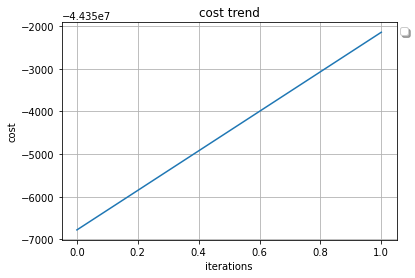

SELF.W: [ 1.32235207e-05 -9.90105500e-06  4.85346157e-05  2.27281981e-04
 -1.26222125e-04  4.50085669e-05 -1.68501505e-04  5.42074644e-05
  1.55945988e-04  1.62424827e-04  1.03738762e-04  1.57582987e-04
  1.34932134e-05  2.04682479e-04]
[[3532 2421]
 [ 204 1843]]
Training Accuracy:  0.671875
Training Precision:  0.4322232645403377
Training Recall:  0.9003419638495359


In [224]:
# The model is executed here on the training set and the output is given from the testing set
lr.runModel(train_df,test_df)

(8000, 6)


  0%|          | 0/5 [00:00<?, ?it/s]

[4.19631686e-07 1.09175152e-04 7.83648767e-05 5.20528952e-05
 7.85559365e-05 9.96000000e-05]


 20%|██        | 1/5 [00:02<00:08,  2.14s/it]

-44358471.01306933
[8.40543807e-07 2.18320629e-04 1.56707354e-04 1.04092018e-04
 1.57088784e-04 1.99188039e-04]


 20%|██        | 1/5 [00:04<00:17,  4.26s/it]
No handles with labels found to put in legend.


-44355523.86458715
The Model Stopped - No Further Improvement


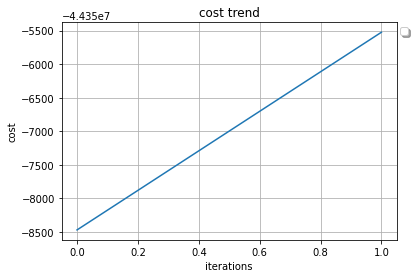

SELF.W: [8.40543807e-07 2.18320629e-04 1.56707354e-04 1.04092018e-04
 1.57088784e-04 1.99188039e-04]
[[4092 1916]
 [  86 1906]]
Training Accuracy:  0.74975
Training Precision:  0.4986917844060701
Training Recall:  0.9568273092369478


In [225]:
#numerical columns
df1 = df[['age','fnlwgt','education_num','capital gain', 'capital loss', 'hours per week','income']]
train_df,test_df = train_test_split(df1,train_size=0.8)
lr.runModel(train_df,test_df)

(8000, 10)


  0%|          | 0/5 [00:00<?, ?it/s]

[ 5.27298685e-06  1.11628558e-04 -6.35256393e-05  1.70305773e-05
  2.74180953e-05  7.97780418e-05  5.46954023e-05  7.72025776e-05
  8.32619487e-06  1.02050000e-04]


 20%|██        | 1/5 [00:02<00:08,  2.14s/it]

-44357950.749323905
[ 1.05419875e-05  2.23224471e-04 -1.27030786e-04  3.40544070e-05
  5.48265317e-05  1.59531226e-04  1.09375140e-04  1.54378780e-04
  1.66477061e-05  2.04085979e-04]


 20%|██        | 1/5 [00:04<00:17,  4.26s/it]
No handles with labels found to put in legend.


-44354483.81308432
The Model Stopped - No Further Improvement


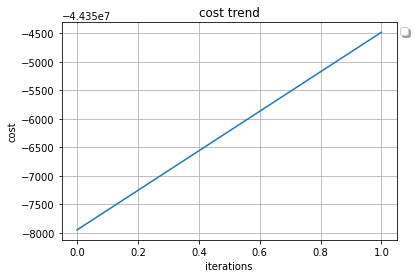

SELF.W: [ 1.05419875e-05  2.23224471e-04 -1.27030786e-04  3.40544070e-05
  5.48265317e-05  1.59531226e-04  1.09375140e-04  1.54378780e-04
  1.66477061e-05  2.04085979e-04]
[[3655 2304]
 [  92 1949]]
Training Accuracy:  0.7005
Training Precision:  0.45826475429108865
Training Recall:  0.9549240568348849


In [226]:
#removing the unnecessary columns
df = df[['age','workclass','education_num','marital','occupation','race','capital gain', 'capital loss', 'hours per week','country','income']]
train_df,test_df = train_test_split(df,train_size=0.8)
lr.runModel(train_df,test_df)

In [227]:
X = df[df.columns[0:1]]
y = df[["income"]]
from sklearn.linear_model import LogisticRegression
LRG = LogisticRegression(solver = 'saga',multi_class = 'auto'
).fit(X, y)
LRG.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7332

In [228]:
class SVM:
    
    def __init__(self, learningRate = 0.00001, lambdaParam = 0.001, nIters = 100):
        
        self.learningRate = learningRate
        self.lambdaParam = lambdaParam
        self.nIters = nIters

    def fit(self, X, y):
        nSamples, nFeatures = X.shape
        self.w = np.zeros(nFeatures)
        self.b = 0

        for _ in range(self.nIters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1

                if condition:
                    self.w -= self.learningRate * (2 * self.lambdaParam * self.w)

                else:
                    self.w -= self.learningRate * (2 * self.lambdaParam * self.w - y[idx] * x_i)
                    self.b -= self.learningRate * (-y[idx])

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)
     

In [229]:
# MODEL 2 - SVM
# An SVM model is fitted on the dataset to see how the dataset works on this model
clf = SVM()

In [230]:
# The dataframe is split into an input X and output y
y = df[["income"]]
X = df.drop('income', axis = 1)
# The dataframes are converted into a numpy array data type
X = X.to_numpy()
y = y.to_numpy()
# The datasets are split into a training and testing set where 70% of the data is
# the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
clf.fit(X_train, y_train)

In [231]:
print(clf.w)

[ 0.20190707 -0.00667047  0.21167526 -0.21065057  0.01398886  0.04997774
  0.09254809  0.05273568  0.18636243  0.0163812 ]


In [232]:
print(clf.b)

[0.96529]


In [233]:
# Printing the predicted values using the X_test data
print(clf.predict(X_test))

[1. 1. 1. ... 1. 1. 1.]


In [234]:
import tensorflow.keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Input, MaxPool2D, Dense, Conv2D, Dropout

In [235]:
def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [236]:
# MODEL 3 - NEURAL NETWORKS
# The neural network model is implemented to fit the data and to check for the prediction accuracy 
model = Sequential()
# 4 layers are added for the model 
model.add(Dense(128, kernel_initializer = 'normal', input_dim = 10, activation = 'relu'))
model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
# A sigmoid acitvation is used because the output is in a binary format
model.add(Dense(1, activation = 'sigmoid'))

In [237]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [238]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_46 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_47 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_48 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 257       
Total params: 166,273
Trainable params: 166,273
Non-trainable params: 0
_________________________________________________________________


In [239]:
model.fit(X_train, y_train, batch_size=64, epochs=2)

Epoch 1/2
125/125 [==============================] - 1s 8ms/step - loss: 0.4081 - accuracy: 0.8073
Epoch 2/2
125/125 [==============================] - 1s 7ms/step - loss: 0.3455 - accuracy: 0.8374


In [240]:
results = model.evaluate(X_test, y_test, batch_size=128)
results

16/16 [==============================] - 0s 5ms/step - loss: 0.3560 - accuracy: 0.8315


[0.35595622658729553, 0.8314999938011169]